<a href="https://colab.research.google.com/github/sravika1914/crop_disease_prediction/blob/main/Crop_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

model = tf.saved_model.load('/content/drive/MyDrive/EfficientNet')
classes = [ "Ash gourd - Healthy" ,  "Ash gourd - Nitrogen and Magnesium Deficiency" ,
           "Ash gourd - Nitrogen and Potassium Deficiency" ,  "Ash gourd - Nitrogen Deficiency" ,
           "Ash gourd - Potassium and Magnesium Deficiency" ,  "Ash gourd - Potassium Deficiency" ,
           "Ash gourd - Powdery Mildew" ,  "Bitter gourd - Downy Mildew" ,  "Bitter gourd - Healthy" ,
           "Bitter gourd - Jassid" ,  "Bitter gourd - Leaf Spot" ,
           "Bitter gourd - Nitrogen and Magnesium Deficiency" ,
           "Bitter gourd - Nitrogen and Potassium Deficiency" ,  "Bitter gourd - Nitrogen Deficiency" ,
           "Bitter gourd - Potassium and Magnesium Deficiency" ,  "Bitter gourd - Potassium Deficiency" ,
           "Bottle gourd - Downy Mildew" ,  "Bottle gourd - Healthy" ,  "Bottle gourd - Jassid" ,
           "Bottle gourd - Jassid and Mite" ,  "Bottle gourd - Leaf Spot" ,
           "Bottle gourd - Nitrogen and Magnesium Deficiency" ,
           "Bottle gourd - Nitrogen and Potassium Deficiency" ,  "Bottle gourd - Nitrogen Deficiency" ,
           "Bottle gourd - Potassium Deficiency" ,  "Cucumber - Healthy" ,
           "Cucumber - Nitrogen and Potassium Deficiency" ,  "Cucumber - Nitrogen Deficiency" ,
           "Cucumber- Potassium Deficiency" ,  "Eggplant - Epilachna Beetle" ,  "Eggplant - Flea Beetle" ,
           "Eggplant - Healthy" ,  "Eggplant - Jassid" ,  "Eggplant - Mite" ,
           "Eggplant - Mite and Epilachna Beetle" ,  "Eggplant - Nitrogen and Potassium Deficiency" ,
           "Eggplant - Nitrogen Deficiency" ,  "Eggplant - Potassium Deficiency" ,
           "Ridge gourd -  Pumpkin Caterpillar" ,  "Ridge gourd - Healthy" ,
           "Ridge gourd - Nitrogen and Magnesium Deficiency" ,
           "Ridge gourd - Nitrogen Deficiency" ,  "Ridge gourd - Pumpkin Leaf Eating Insect" ,
           "Ridge gourd - Pumpkin Leaf Eating Insect and Insect Egg Mass" ,
           "Ridge gourd - Pumpkin Leaf Eating Insect and Mite" ,  "Snake gourd - Healthy" ,
           "Snake gourd - Leaf Spot" ,  "Snake gourd - Nitrogen and Potassium Deficiency" ,
           "Snake gourd - Nitrogen Deficiency" ,  "Snake gourd - Potassium Deficiency" ,
           "Tomato - Healthy" ,  "Tomato - Jassid and Mite" ,  "Tomato - Leaf Miner" ,  "Tomato - Mite" ,
           "Tomato - Nitrogen and Potassium Deficiency" ,  "Tomato - Nitrogen Deficiency" ,
           "Tomato - Potassium Deficiency" , ]

In [ ]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/vegetation-diseases-detection/train'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

[]

In [ ]:
train=pd.DataFrame()
train=train.assign(filename=Id)
train.head()

,filename


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['filename']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'filename'}, axis=1)
              .sort_values('filename', ascending=True))
  xs = counted['filename']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('filename', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('filename')
_ = plt.ylabel('count()')

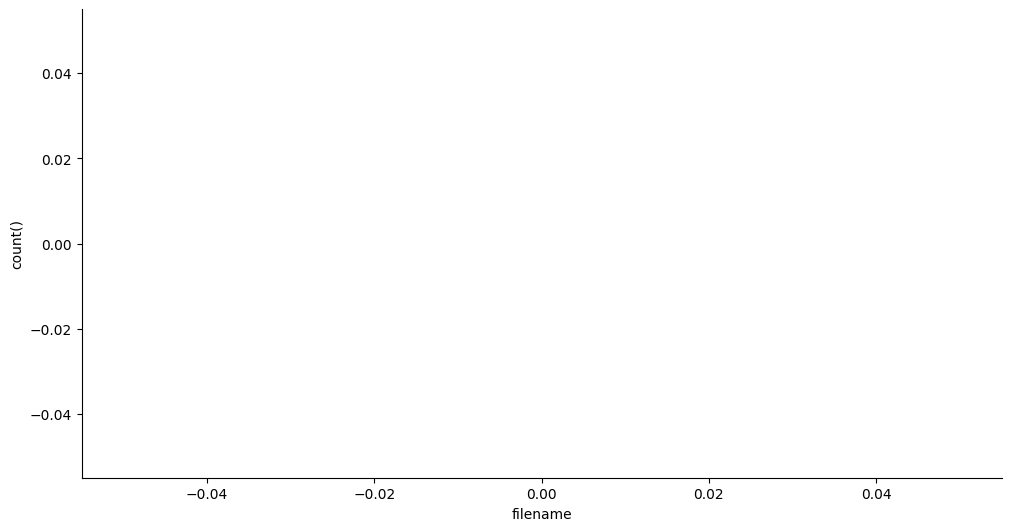

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['filename']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'filename'}, axis=1)
              .sort_values('filename', ascending=True))
  xs = counted['filename']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('filename', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('filename')
_ = plt.ylabel('count()')

In [ ]:
import pandas as pd

# Example DataFrame creation for illustration
# Replace this with your actual DataFrame loading code
# Example: train = pd.read_csv('path_to_your_csv_file.csv')
data = {'filename': ['/kaggle/input/vegetation-diseases-detection/train/class1_image1.jpg',
                     '/kaggle/input/vegetation-diseases-detection/train/class2_image2.jpg']}
train = pd.DataFrame(data)

# Extract labels from filenames
train['label'] = train['filename'].str.replace('/kaggle/input/vegetation-diseases-detection/train/', '')

# Display the first few rows of the DataFrame
print(train.head())


                                            filename              label
0  /kaggle/input/vegetation-diseases-detection/tr...  class1_image1.jpg
1  /kaggle/input/vegetation-diseases-detection/tr...  class2_image2.jpg


In [ ]:
train['label'] = train['label'].str.split('/').str[0]
train.head()

,filename,label
0,/kaggle/input/vegetation-diseases-detection/tr...,class1_image1.jpg
1,/kaggle/input/vegetation-diseases-detection/tr...,class2_image2.jpg


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_4.groupby('filename')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('filename')
_ = plt.ylabel('label')

In [ ]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/vegetation-diseases-detection/test'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

[]

In [ ]:
test=pd.DataFrame()
test=test.assign(filename=Id)
test.head()

,filename


In [ ]:
import pandas as pd

# Example DataFrame creation for illustration
# Replace this with your actual DataFrame loading code
# Example: test = pd.read_csv('path_to_your_test_csv_file.csv')
data = {'filename': ['/kaggle/input/vegetation-diseases-detection/test/class1_image1.jpg',
                     '/kaggle/input/vegetation-diseases-detection/test/class2_image2.jpg']}
test = pd.DataFrame(data)

# Check the data types of the columns
print(test.dtypes)

# Convert 'filename' column to string, if not already
test['filename'] = test['filename'].astype(str)

# Extract labels from filenames
test['label'] = test['filename'].str.replace('/kaggle/input/vegetation-diseases-detection/test/', '')

# Display the first few rows of the DataFrame
print(test.head())


filename    object
dtype: object
                                            filename              label
0  /kaggle/input/vegetation-diseases-detection/te...  class1_image1.jpg
1  /kaggle/input/vegetation-diseases-detection/te...  class2_image2.jpg


In [ ]:
test['label'] = test['label'].str.split('/').str[0]
test.head()

,filename,label
0,/kaggle/input/vegetation-diseases-detection/te...,class1_image1.jpg
1,/kaggle/input/vegetation-diseases-detection/te...,class2_image2.jpg


from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_7.groupby('filename')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('filename')
_ = plt.ylabel('label')

In [ ]:
# Print the first few filenames to verify their correctness
print(test['filename'].head())


0    /kaggle/input/vegetation-diseases-detection/te...
1    /kaggle/input/vegetation-diseases-detection/te...
Name: filename, dtype: object


In [ ]:
import os

# Check if files exist
for path in test['filename']:
    if not os.path.exists(path):
        print(f"File not found: {path}")


File not found: /kaggle/input/vegetation-diseases-detection/test/class1_image1.jpg
File not found: /kaggle/input/vegetation-diseases-detection/test/class2_image2.jpg


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os

result = []
for path in test['filename']:
    if not os.path.exists(path):
        print(f"File not found: {path}")
        result.append("Unknown")  # Handle missing files
        continue

    # Open and process the image
    img = Image.open(path).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])

print(result[:5])


File not found: /kaggle/input/vegetation-diseases-detection/test/class1_image1.jpg
File not found: /kaggle/input/vegetation-diseases-detection/test/class2_image2.jpg
['Unknown', 'Unknown']


In [ ]:
test=test.assign(prediction=result)
test.head()

,filename,label,prediction
0,/kaggle/input/vegetation-diseases-detection/te...,class1_image1.jpg,Unknown
1,/kaggle/input/vegetation-diseases-detection/te...,class2_image2.jpg,Unknown


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_10.groupby('filename')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('filename')
_ = plt.ylabel('label')

In [ ]:
import pandas as pd

# Create a DataFrame with one image for illustration
data = {'filename': ['/kaggle/input/vegetation-diseases-detection/test/class1_image1.jpg']}
test = pd.DataFrame(data)



In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os

# Assuming you have the model and classes already defined
result = []

# Process the single image
path = '/content/drive/MyDrive/EfficientNet/image.jpg'  # Extract the path of the single image
if not os.path.exists(path):
    print(f"File not found: {path}")
else:
    # Open and process the image
    img = Image.open(path).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])

print(result)


<ipython-input-27-ed616718895e>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)


['Tomato - Healthy']


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import pandas as pd

# Example DataFrame creation for illustration (adjust as needed)
data = {'filename': ['/kaggle/input/vegetation-diseases-detection/train/image.jpg']}
train = pd.DataFrame(data)

# Assuming you have the model and classes already defined
result = []

# Extract the path of the single image
path = train['filename'][0]  # Get the filename from the DataFrame

# Check if the file exists
if not os.path.exists(path):
    print(f"File not found: {path}")
else:
    # Open and process the image
    img = Image.open(path).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')

    # Run the model prediction
    class_scores = model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])

print(result)


File not found: /kaggle/input/vegetation-diseases-detection/train/image.jpg
[]


In [ ]:
print(f"Length of result: {len(result)}")
print(f"Length of DataFrame: {len(train)}")


Length of result: 0
Length of DataFrame: 1


In [ ]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import tensorflow as tf

# Example DataFrame creation for illustration
data = {'filename': ['/kaggle/input/vegetation-diseases-detection/train/image.jpg']}
train = pd.DataFrame(data)

# Extract the path of the single image
path = train['filename'][0]  # Get the filename from the DataFrame
print(f"Path to the image: {path}")

# Check if the file exists
if not os.path.exists(path):
    print(f"File not found: {path}")
else:
    # Open and process the image
    img = Image.open(path).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')

    # Assuming you have the model and classes already defined
    # Run the model prediction
    class_scores = model(inp)[0].numpy()
    result = [classes[class_scores.argmax()]]
    print(f"Prediction: {result[0]}")


Path to the image: /kaggle/input/vegetation-diseases-detection/train/image.jpg
File not found: /kaggle/input/vegetation-diseases-detection/train/image.jpg


In [ ]:
print(train.columns)


Index(['filename'], dtype='object')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['label'],train['prediction']))

              precision    recall  f1-score   support

      class1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
print(test.columns)


Index(['filename'], dtype='object')


In [ ]:
print(test.head())


                                            filename
0  /kaggle/input/vegetation-diseases-detection/te...


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Example DataFrame for illustration
data = {
    'filename': ['/kaggle/input/vegetation-diseases-detection/test/image.jpg'],
    'label': ['class1'],        # Assuming the actual label column name is 'label'
    'prediction': ['class1']   # Assuming the actual prediction column name is 'prediction'
}
test = pd.DataFrame(data)

# Print DataFrame columns to verify names
print("DataFrame columns:", test.columns)
print(test.head())

# Generate classification report using correct column names
try:
    print(classification_report(test['label'], test['prediction']))
except KeyError as e:
    print(f"Column not found: {e}")


DataFrame columns: Index(['filename', 'label', 'prediction'], dtype='object')
                                            filename   label prediction
0  /kaggle/input/vegetation-diseases-detection/te...  class1     class1
              precision    recall  f1-score   support

      class1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

